# Użycie PySpark w celu eksploracji Big Data

<b>PySpark</b> to open source'owy interfejs Apache Spark API używany do rozproszonego przetwarzania dużych zbiorów danych. Został pierwotnie opracowany w języku programowania Scala na Uniwersytecie Kalifornijskim w Berkeley.

<b>Spark</b> zapewnia interfejsy API dla Scala, Java, Python i R. System obsługuje ponowne wykorzystanie kodu między obciążeniami, przetwarzanie wsadowe, zapytania interaktywne, analizy w czasie rzeczywistym, uczenie maszynowe i przetwarzanie wykresów. Wykorzystuje buforowanie w pamięci i zoptymalizowane wykonywanie zapytań na danych o dowolnym rozmiarze.

Nie ma jednego natywnego systemu plików, takiego jak Hadoop Distributed File System (HDFS), zamiast tego Spark obsługuje wiele popularnych systemów plików, takich jak HDFS, HBase, Cassandra, Amazon S3, Amazon Redshift, Couchbase i inne.

<b>Korzyści</b> z używania Apache Spark:

- Uruchamia programy w pamięci do 100 razy szybciej niż Hadoop MapReduce i 10 razy szybciej na dysku, ponieważ Spark wykonuje przetwarzanie w pamięci głównej węzłów roboczych i zapobiega niepotrzebnym we/wy.
- Spark jest niezwykle przyjazny dla użytkownika, ponieważ ma interfejsy API napisane w popularnych językach, co ułatwia programistom: ukrywa złożoność przetwarzania rozproszonego za prostymi instrukcjami wysokiego poziomu, co znacznie zmniejsza ilość wymaganego kodu.
- System można wdrożyć za pomocą Mesos, Hadoop przez Yarn lub własnego menedżera klastra Spark.
- Spark wykonuje obliczenia w czasie rzeczywistym i zapewnia małe opóźnienia ze względu na ich wykonanie rezydentne (w pamięci).

## Konfigurowanie środowiska w Anaconda lub Google Colab

Aby uruchomić pyspark na komputerze lokalnym, potrzebujemy Javy i innego oprogramowania. W ogólnej sytuacji instalujemu JDK (sprawdzono na wersji Java 12), odpowiednio ustalamy zmienne środowiskowe `JAVA_HOME`, `PATH`. Dalej instalujemy Apache Hadoop (wraz z odpowiednim Winutils.exe), ustalamy zmienne środowiskowe `HADOOP_HOME`, `PATH`. Z innej strony zamiast skomplikowanej procedury konfiguracyjnej możemy skorzystać z Google Colaboratory, które doskonale odpowiada naszym wymaganiom sprzętowym, a także zawiera szeroką gamę bibliotek do analizy danych i uczenia maszynowego. 

Tak więc wszystko, co musimy zrobić, to zainstalować pakiety pyspark i Py4J. Py4J umożliwia programom Pythona uruchomionym w interpreterze Pythona dynamiczny dostęp do obiektów Java z wirtualnej maszyny języka Java.

In [ ]:
# Polecenie do zainstalowania powyższych pakietów:

! pip install pyspark == 3.0.1 py4j == 0.10.9

## Sesja Spark
SparkSession jest punktem wejścia do PySpark od wersji 2.0: był wcześniej używany dla tego SparkContext. SparkSession to sposób na zainicjowanie podstawowych funkcji PySpark w celu programowego tworzenia PySpark RDD, DataFrame i Dataset. Może być używany zamiast SQLContext, HiveContext i innych kontekstów zdefiniowanych przed wersją 2,0.

Należy również pamiętać, że SparkSession wewnętrznie tworzy SparkConfig i SparkContext z konfiguracją dostarczoną z SparkSession. SparkSession można utworzyć za pomocą `SparkSession.builder`, który jest implementacją wzorca projektowego Builder.

## Tworzenie SparkSession
Aby utworzyć SparkSession, musisz użyć metody `builder()`.

- `getOrCreate()` zwraca istniejącą SparkSession; jeśli nie istnieje, tworzona jest nowa SparkSession.
- `master()`: jeśli pracujesz z klastrem, jako argument musisz podać nazwę menedżera klastra. Zazwyczaj będzie to `yarn` lub `mesos`, w zależności od konfiguracji klastra, a w trybie offline używany jest `local[x]`. Tutaj `x` musi być liczbą całkowitą większą niż 0. Ta wartość wskazuje, ile partycji zostanie utworzonych przy użyciu RDD, DataFrame i Dataset. Idealnie, `x` powinien odpowiadać liczbie rdzeni procesora.
- `appName()` służy do ustawienia nazwy aplikacji.

Przykład tworzenia SparkSession:

In [6]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local[*]")\
        .appName('PySpark_Tutorial')\
        .getOrCreate()

# gdzie "*" znaczy wszystkie rdzenie procesora.

## Czytanie danych
Za pomocą `spark.read` możemy odczytywać dane z plików różnych formatów, takich jak CSV, JSON, Parquet i inne. Oto kilka przykładów pobierania danych z plików:

In [8]:
# Czytanie CSV plika
csv_file = 'data/1.csv'
df = spark.read.csv(csv_file)

# Czytanie JSON plika
json_file = 'data/unece.json'
data = spark.read.json(json_file)

# Czytanie parquet plika
parquet_file = 'data/pems_parquet/pems_sorted/station=402260/part-r-00000-ddaee723-f3f6-4f25-a34b-3312172aa6d7.snappy.parquet'
data1 = spark.read.parquet(parquet_file)

## Pobieranie danych za pomocą URL

In [53]:
from pyspark import SparkFiles

spark.sparkContext.addFile('https://storage.covid19datahub.io/level/1.csv')
#spark.sparkContext.addFile('https://storage.covid19datahub.io/country/UKR.csv')

df = spark.read.csv(SparkFiles.get("1.csv"), header=True)
#df = spark.read.csv(SparkFiles.get("UKR.csv"), header=True)

# Strukturyzacja danych za pomocą schematu Spark

Kod do odczytu danych w formacie pliku CSV:

In [10]:
data = spark.read.csv(
    'data/1.csv',
    sep=',',
    header=True,
)

data.printSchema()

root
 |-- id: string (nullable = true)
 |-- date: string (nullable = true)
 |-- confirmed: string (nullable = true)
 |-- deaths: string (nullable = true)
 |-- recovered: string (nullable = true)
 |-- tests: string (nullable = true)
 |-- vaccines: string (nullable = true)
 |-- people_vaccinated: string (nullable = true)
 |-- people_fully_vaccinated: string (nullable = true)
 |-- hosp: string (nullable = true)
 |-- icu: string (nullable = true)
 |-- vent: string (nullable = true)
 |-- school_closing: string (nullable = true)
 |-- workplace_closing: string (nullable = true)
 |-- cancel_events: string (nullable = true)
 |-- gatherings_restrictions: string (nullable = true)
 |-- transport_closing: string (nullable = true)
 |-- stay_home_restrictions: string (nullable = true)
 |-- internal_movement_restrictions: string (nullable = true)
 |-- international_movement_restrictions: string (nullable = true)
 |-- information_campaigns: string (nullable = true)
 |-- testing_policy: string (nullable

Przyjrzyjmy się teraz schematowi danych przy użyciu metody `PrintSchema`.

Schemat Spark wyświetla strukturę ramki danych lub zestawu danych. Możemy go zdefiniować za pomocą klasy `StructType`, która jest kolekcją obiektów `StructField`. Z kolei ustawiają nazwę kolumny (`String`), jej typ (`DataType`), czy dopuszczalna jest wartość NULL (`Boolean`) i metadane (`MetaData`).

Może to być całkiem przydatne, nawet jeśli Spark automatycznie wywnioskuje schemat z danych, ponieważ czasami zakładany typ może być błędny lub musimy zdefiniować własne nazwy kolumn i typy danych. Dzieje się tak często podczas pracy z całkowicie lub częściowo nieustrukturyzowanymi danymi.
Zobaczmy, jak możemy ustrukturyzować nasze dane:

In [11]:
from pyspark.sql.types import *

data_schema = [
               StructField('confirmed', IntegerType(), True),
               StructField('people_vaccinated', IntegerType(), True),
               StructField('economic_support_index', DoubleType(), True),
               StructField('iso_currency', StringType(), True),
            ]

final_struc = StructType(fields = data_schema)

data = spark.read.csv(
    'data/1.csv',
    sep=',',
    header=True,
    schema=final_struc 
)

data.printSchema()

root
 |-- confirmed: integer (nullable = true)
 |-- people_vaccinated: integer (nullable = true)
 |-- economic_support_index: double (nullable = true)
 |-- iso_currency: string (nullable = true)



Powyższy kod tworzy strukturę danych za pomocą `StructType` i `StructField`. Następnie jest przekazywany jako parametr schematu do metody `spark.read.csv()`. Rzuć okiem na wynikowy schemat uporządkowanych danych powyżej

# Różne metody kontroli danych
Dostępne są następujące metody kontroli danych: schema, dtypes, show, head, first, take, description, columns, count, different, printSchema. Przyjrzyjmy się im na przykładzie.

`schema()`: Ta metoda zwraca schemat danych (ramka danych). Przykład znajduje się poniżej.

In [12]:
data.schema

StructType(List(StructField(confirmed,IntegerType,true),StructField(people_vaccinated,IntegerType,true),StructField(economic_support_index,DoubleType,true),StructField(iso_currency,StringType,true)))

`dtypes` zwraca listę krotek z nazwami kolumn i typami danych.

In [13]:
data.dtypes

[('confirmed', 'int'),
 ('people_vaccinated', 'int'),
 ('economic_support_index', 'double'),
 ('iso_currency', 'string')]

`head(n)` zwraca n wierszy jako listę. Oto przykład:

In [18]:
data.head(3)

[Row(confirmed=None, people_vaccinated=None, economic_support_index=None, iso_currency=None),
 Row(confirmed=None, people_vaccinated=None, economic_support_index=None, iso_currency=None),
 Row(confirmed=None, people_vaccinated=None, economic_support_index=None, iso_currency=None)]

- `show()` domyślnie wyświetla pierwsze 20 wierszy, a także przyjmuje liczbę jako parametr określający ich liczbę.
- `first()` zwraca pierwszy wiersz danych.
- `take(n)` zwraca pierwsze `n` wierszy.
- `describe()` oblicza niektóre wartości statystyczne dla kolumn liczbowych.
- `columns` zwraca listę zawierającą nazwy kolumn.
- `count()` zwraca całkowitą liczbę wierszy w zestawie danych.
- `differ()` to liczba odmiennych wierszy w używanym zbiorze danych.
- `printSchema()` wyświetla schemat danych.

# Manipulacja kolumnami
Zobaczmy, jakie metody są używane do dodawania, aktualizowania i usuwania kolumn danych.

1. Dodawanie kolumny: użyj `withColumn`, aby dodać nową kolumnę do istniejących. Metoda przyjmuje dwa parametry: nazwę kolumny i dane. Przykład:

In [23]:
data = data.withColumn('copy_confirmed', data.confirmed)

data.show(5)

+---------+-----------------+----------------------+------------+--------------+
|confirmed|people_vaccinated|economic_support_index|iso_currency|copy_confirmed|
+---------+-----------------+----------------------+------------+--------------+
|     null|             null|                  null|        null|          null|
|     null|             null|                  null|        null|          null|
|     null|             null|                  null|        null|          null|
|     null|             null|                  null|        null|          null|
|     null|             null|                  null|        null|          null|
+---------+-----------------+----------------------+------------+--------------+
only showing top 5 rows



2. Aktualizacja kolumny: użyj `withColumnRenamed`, aby zmienić nazwę istniejącej kolumny. Metoda przyjmuje dwa parametry: nazwę istniejącej kolumny i jej nową nazwę. Przykład:

In [25]:
data = data.withColumnRenamed('copy_confirmed', 'confirmed_changed')

data.show(5)

+---------+-----------------+----------------------+------------+----------------------+
|confirmed|people_vaccinated|economic_support_index|iso_currency|copy_confirmed_changed|
+---------+-----------------+----------------------+------------+----------------------+
|     null|             null|                  null|        null|                  null|
|     null|             null|                  null|        null|                  null|
|     null|             null|                  null|        null|                  null|
|     null|             null|                  null|        null|                  null|
|     null|             null|                  null|        null|                  null|
+---------+-----------------+----------------------+------------+----------------------+
only showing top 5 rows



3. Upuszczanie kolumny: Użyj metody `drop`, która pobiera nazwę kolumny i zwraca dane.

In [26]:
data = data.drop('copy_confirmed_changed')

data.show(5)

+---------+-----------------+----------------------+------------+
|confirmed|people_vaccinated|economic_support_index|iso_currency|
+---------+-----------------+----------------------+------------+
|     null|             null|                  null|        null|
|     null|             null|                  null|        null|
|     null|             null|                  null|        null|
|     null|             null|                  null|        null|
|     null|             null|                  null|        null|
+---------+-----------------+----------------------+------------+
only showing top 5 rows



# Radzenie sobie z brakującymi wartościami
Często napotykamy brakujące wartości podczas pracy z danymi czasu rzeczywistego. Te brakujące wartości są oznaczone jako `NaN`, spacje lub inne symbole zastępcze. Istnieją różne metody radzenia sobie z brakami danych, niektóre z najbardziej popularnych to:

- Usunięcie: usuń wiersze z brakującymi wartościami w dowolnej z kolumn.
- Zastąpienie średniej / mediany: Zastąp brakujące wartości za pomocą średniej lub mediany z odpowiedniej kolumny. Jest prosty, szybki i dobrze współpracuje z małymi zestawami danych liczbowych.
- Zastępowanie najczęstszych wartości: Jak sugeruje nazwa, użyj najczęściej występującej wartości w kolumnie, aby zastąpić brakujące wartości. Działa to dobrze w przypadku atrybutów kategorycznych, ale może również wprowadzić błąd w danych.
- Zastępowanie za pomocą KNN: Metoda K-nearestneighbor to algorytm klasyfikacji, który oblicza podobieństwo cech nowych punktów danych do istniejących przy użyciu różnych metryk odległości, takich jak Euclidean, Mahalanobis, Manhattan, Minkowski, Hamming i inne. To podejście jest dokładniejsze niż wyżej wymienione metody, ale jest intensywne obliczeniowo i dość wrażliwe na wartości odstające.

Zobaczmy, jak możemy wykorzystać PySpark do rozwiązania problemu brakujących wartości:

In [43]:
from pyspark.sql import functions as f

# Usuń wiersze z brakującymi wartościami w dowolnej z kolumn
data.na.drop()

# Zastąp brakujące wartości za pomocą średniej
data.na.fill(data.select(f.mean(data['confirmed'])).collect()[0][0])

# Zastąp brakujące wartości nowymi
data.na.replace(old_value, new_vallue)

NameError: name 'old_value' is not defined

# Pobieranie danych
PySpark i PySpark SQL zapewniają szeroki zakres metod i funkcji do łatwego wyszukiwania danych. Oto lista najczęściej używanych metod:
- Select
- Filter
- Between
- When
- Like
- GroupBy
- Agregowanie

### Select
Służy do wybierania jednej lub więcej kolumn przy użyciu ich nazw. Oto prosty przykład:

In [30]:
# wybór jednej kolumny
data.select('confirmed').show(5)

# wybór kilku kolumn
data.select(['confirmed', 'people_vaccinated', 'iso_currency']).show(5)

+---------+
|confirmed|
+---------+
|     null|
|     null|
|     null|
|     null|
|     null|
+---------+
only showing top 5 rows

+---------+-----------------+------------+
|confirmed|people_vaccinated|iso_currency|
+---------+-----------------+------------+
|     null|             null|        null|
|     null|             null|        null|
|     null|             null|        null|
|     null|             null|        null|
|     null|             null|        null|
+---------+-----------------+------------+
only showing top 5 rows



### Filter
Ta metoda filtruje dane na podstawie określonego warunku. Możesz także określić wiele warunków za pomocą operatorów `AND (&)`, `OR (|)` i `NOT (~)`. Oto przykład uzyskania danych o cenach akcji za styczeń 2020 r.

In [41]:
from pyspark.sql.functions import col

data.filter( (col('confirmed') >= 1000) & (col('confirmed') <= 10000000) ).show(5)

+---------+-----------------+----------------------+------------+
|confirmed|people_vaccinated|economic_support_index|iso_currency|
+---------+-----------------+----------------------+------------+
|  3357425|             null|                  null|        null|
|  3357425|             null|                  null|        null|
|  3357425|             null|                  null|        null|
|  3357425|             null|                  null|        null|
|  3357425|             null|                  null|        null|
+---------+-----------------+----------------------+------------+
only showing top 5 rows



### Between
Ta metoda zwraca `True`, jeśli testowana wartość należy do określonego zakresu, w przeciwnym razie — `False`. Rzućmy okiem na przykład filtrowania danych, w którym wartości wahają się od 1000000 do 5000000 .

In [36]:
data.filter(data.confirmed.between(1000000, 5000000)).show()

+---------+-----------------+----------------------+------------+
|confirmed|people_vaccinated|economic_support_index|iso_currency|
+---------+-----------------+----------------------+------------+
|  3357425|             null|                  null|        null|
|  3357425|             null|                  null|        null|
|  3357425|             null|                  null|        null|
|  3357425|             null|                  null|        null|
|  3357425|             null|                  null|        null|
|  3357425|             null|                  null|        null|
|  3357425|             null|                  null|        null|
|  3357425|             null|                  null|        null|
|  3357425|             null|                  null|        null|
|  3357425|             null|                  null|        null|
|  3357425|             null|                  null|        null|
|  3357425|             null|                  null|        null|
|  3357425

### When
Zwraca 0 lub 1 w zależności od określonego warunku.

In [42]:
data.select('confirmed', 'people_vaccinated', 
            f.when(data.iso_currency == '98739', 1).otherwise(0)
).show(5)

+---------+-----------------+--------------------------------------------------+
|confirmed|people_vaccinated|CASE WHEN (iso_currency = 98739) THEN 1 ELSE 0 END|
+---------+-----------------+--------------------------------------------------+
|     null|             null|                                                 0|
|     null|             null|                                                 0|
|     null|             null|                                                 0|
|     null|             null|                                                 0|
|     null|             null|                                                 0|
+---------+-----------------+--------------------------------------------------+
only showing top 5 rows



### Like
Ta metoda jest podobna do operatora Like w SQL. Poniższy kod demonstruje użycie `rlike()` do pobierania nazw iso_currency zaczynających się na cyfry 9 lub 7.

In [45]:
data.select(
    'iso_currency', 
    data.iso_currency.rlike('^[9,7]').alias('iso_urrency zaczyba sie na 9 lub 7')
).distinct().show()

+------------+----------------------------------+
|iso_currency|iso_urrency zaczyba sie na 9 lub 7|
+------------+----------------------------------+
|         450|                             false|
|       27121|                             false|
|          19|                             false|
|         884|                             false|
|         909|                              true|
|        1412|                             false|
|        4320|                             false|
|         542|                             false|
|        1888|                             false|
|        4311|                             false|
|        5095|                             false|
|        9537|                              true|
|        3690|                             false|
|       10922|                             false|
|         394|                             false|
|        6035|                             false|
|        6393|                             false|


### GroupBy
Sama nazwa sugeruje, że ta funkcja grupuje dane według wybranej kolumny i wykonuje różne operacje, takie jak obliczanie sumy, średniej, minimalnej, maksymalnej wartości itp. Poniższy przykład wyjaśnia, jak uzyskać średnią confirmed, people_vaccinated  według iso_currency.

In [48]:
data.select(['confirmed', 'people_vaccinated', 'iso_currency'])\
    .groupBy('iso_currency')\
    .mean()\
    .show()

+------------+--------------+----------------------+
|iso_currency|avg(confirmed)|avg(people_vaccinated)|
+------------+--------------+----------------------+
|         467|          null|                  null|
|         675|    1.962488E7|                  null|
|         296|     3357425.0|                  null|
|        1090|          null|                  null|
|        1572|          null|                  null|
|        2136|          null|                  null|
|        1512|          null|                  null|
|       65897|          null|                  null|
|        3606|          null|                  null|
|       21452|          null|                  null|
|        6240|          null|                  null|
|       10096|          null|                  null|
|        4821|   7.8833522E7|                  null|
|       15269|          null|                  null|
|       15634|          null|                  null|
|       16504|          null|                 

### Agregacja
PySpark zapewnia wbudowane standardowe funkcje agregacji zdefiniowane w API DataFrame, które mogą się przydać, gdy musimy zagregować wartości Twoich kolumn. Innymi słowy, takie funkcje działają na kilka wierszy i oblicza pojedynczą wartość powrotną dla każdej grupy.

Poniższy przykład pokazuje, jak wyświetlić najniższe, najwyższe i średnie confirmed, people_vaccinated dla każdej iso_currency.

In [49]:
from pyspark.sql import functions as f

data.filter((col('confirmed') >= 1000000) & (col('confirmed') <= 5000000))\
    .groupBy("iso_currency") \
    .agg(f.min("confirmed").alias("from"), 
         f.max("confirmed").alias("to"), 
         
         f.min("people_vaccinated").alias("minimum vaccinated"),
         f.max("people_vaccinated").alias("maximum vaccinated"), 
         f.avg("people_vaccinated").alias("average vaccinated"), 

         f.min("economic_support_index").alias("minimum economic_support_index"),
         f.max("economic_support_index").alias("maximum economic_support_index"), 
         f.avg("economic_support_index").alias("average economic_support_index"), 

      ).show(truncate=False)

+------------+-------+-------+------------------+------------------+------------------+------------------------------+------------------------------+------------------------------+
|iso_currency|from   |to     |minimum vaccinated|maximum vaccinated|average vaccinated|minimum economic_support_index|maximum economic_support_index|average economic_support_index|
+------------+-------+-------+------------------+------------------+------------------+------------------------------+------------------------------+------------------------------+
|296         |3357425|3357425|null              |null              |null              |13283.0                       |13283.0                       |13283.0                       |
|870         |3357425|3357425|null              |null              |null              |34455.0                       |34455.0                       |34455.0                       |
|926         |3357425|3357425|null              |null              |null              |35719.0 

## Wizualizacja danych
Do wizualizacji danych wykorzystamy biblioteki `matplotlib` i `pandas`. Metoda `toPandas()` umożliwia nam przekształcenie danych w ramkę danych pandas, której używamy, gdy wywołujemy metodę renderowania `plot()`. Poniższy kod pokazuje, jak wyświetlić histogram, który wyświetla średnie confirmed, people_vaccinated, economic_support_index dla każdej iso_currency.

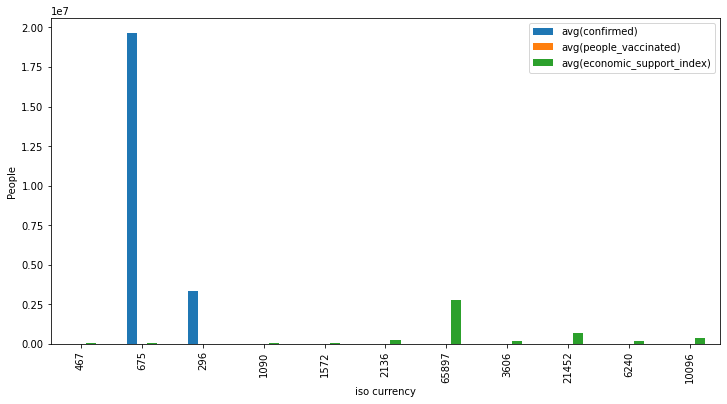

In [51]:
from matplotlib import pyplot as plt

currency_df =  data.select(['iso_currency', 
                       'confirmed', 
                       'people_vaccinated', 
                       'economic_support_index']
                     )\
                     .groupBy('iso_currency')\
                     .mean()\
                     .toPandas()

ind = list(range(12))
ind.pop(6)

currency_df.iloc[ind ,:].plot(kind='bar', x='iso_currency', y=currency_df.columns.tolist()[1:], 
                         figsize=(12, 6), ylabel='People', xlabel='iso currency')
plt.show()

## Zapisywanie/zapisywanie danych do pliku
Metoda `write.save()` służy do zapisywania danych w różnych formatach, takich jak CSV, JSVON, Parquet i inne. Przyjrzyjmy się, jak zapisywać dane do plików o różnych formatach. Za pomocą metody `select()` możemy zapisać zarówno wszystkie wiersze, jak i tylko wybrane.

In [ ]:
# CSV
data.write.csv('dataset.csv')

# JSON
data.write.save('dataset.json', format='json')

# Parquet
data.write.save('dataset.parquet', format='parquet')

# Zapisywanie wybranych kolumn

# CSV
data.select(['iso_currency','confirmed','people_vaccinated','economic_support_index'])\
    .write.csv('dataset.csv')

# JSON
data.select(['iso_currency','confirmed','people_vaccinated','economic_support_index'])\
    .write.save('dataset.json', format='json')

# Parquet
data.select(['iso_currency','confirmed','people_vaccinated','economic_support_index'])\
    .write.save('dataset.parquet', format='parquet')